In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=LJHTRVJ6TEMRLDXI'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2023-08-22', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-08-22': {'1. open': '177.0600', '2. high': '177.6800', '3. low': '176.2500', '4. close': '177.2300', '5. volume': '42084245'}, '2023-08-21': {'1. open': '175.0700', '2. high': '176.1300', '3. low': '173.7350', '4. close': '175.8400', '5. volume': '46311879'}, '2023-08-18': {'1. open': '172.3000', '2. high': '175.1000', '3. low': '171.9600', '4. close': '174.4900', '5. volume': '61172150'}, '2023-08-17': {'1. open': '177.1400', '2. high': '177.5054', '3. low': '173.4800', '4. close': '174.0000', '5. volume': '66062882'}, '2023-08-16': {'1. open': '177.1300', '2. high': '178.5400', '3. low': '176.5000', '4. close': '176.5700', '5. volume': '46964857'}, '2023-08-15': {'1. open': '178.8800', '2. high': '179.4800', '3. low': '177.0500', '4. close': '177.4500', 

In [2]:

# Extract Time Series data
time_series_data = data['Time Series (Daily)']

# Convert to DataFrame
APPL_stocks_df = pd.DataFrame.from_dict(time_series_data, orient='index')

# Rename columns for clarity
APPL_stocks_df.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
}, inplace=True)

# Convert columns to appropriate data types
APPL_stocks_df = APPL_stocks_df.astype({'Open': float, 'High': float, 'Low': float, 'Close': float, 'Volume': int})

# Convert index (date) to datetime
APPL_stocks_df.index = pd.to_datetime(APPL_stocks_df.index)

# Data Exploration:

In [3]:
APPL_stocks_df.tail()

,Open,High,Low,Close,Volume
1999-11-05,84.62,88.37,84.00,88.31,3721500
1999-11-04,82.06,85.37,80.62,83.62,3384700
1999-11-03,81.62,83.25,81.00,81.50,2932700
1999-11-02,78.00,81.69,77.31,80.25,3564600
1999-11-01,80.00,80.69,77.37,77.62,2487300


In [4]:
APPL_stocks_df.describe()

,Open,High,Low,Close,Volume
count,5990.000000,5990.000000,5990.000000,5990.000000,5.990000e+03
mean,173.243016,175.177363,171.199939,173.245444,3.187800e+07
std,150.540623,151.783018,149.094275,150.474757,3.012338e+07
min,12.990000,13.190000,12.720000,13.120000,7.025000e+05
25%,72.037500,72.802500,71.040000,71.857750,1.137258e+07
50%,132.405000,134.165000,130.365000,132.300000,2.334015e+07
75%,200.757500,202.800000,198.690000,200.647000,4.134380e+07
max,702.410000,705.070000,699.570000,702.100000,3.326072e+08


In [5]:
# Check for missing values in the DataFrame
missing_values = APPL_stocks_df.isna()
# Sum the missing values for each column
missing_sum = missing_values.sum()
missing_sum

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Data Cleaning:

# Data Visualization:

# line chart of closing prices using Matplotlib

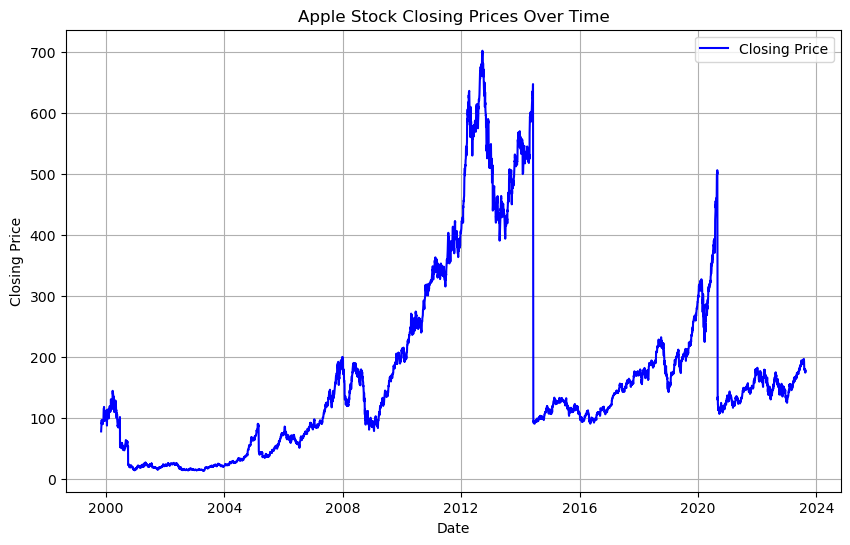

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Close'], label='Closing Price', color='blue')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# Candlestick chart: 
shows the open, high, low, and close prices for each trading day. This can provide insights into price movements within each day.A candlestick chart, also known as a Japanese candlestick chart, is a type of financial chart used to represent the price movements of an asset (such as a stock) over a specific time period, often a single trading day. It displays the opening, closing, high, and low prices of the asset for each time interval. Candlestick charts provide valuable insights into price trends and patterns within a trading day.

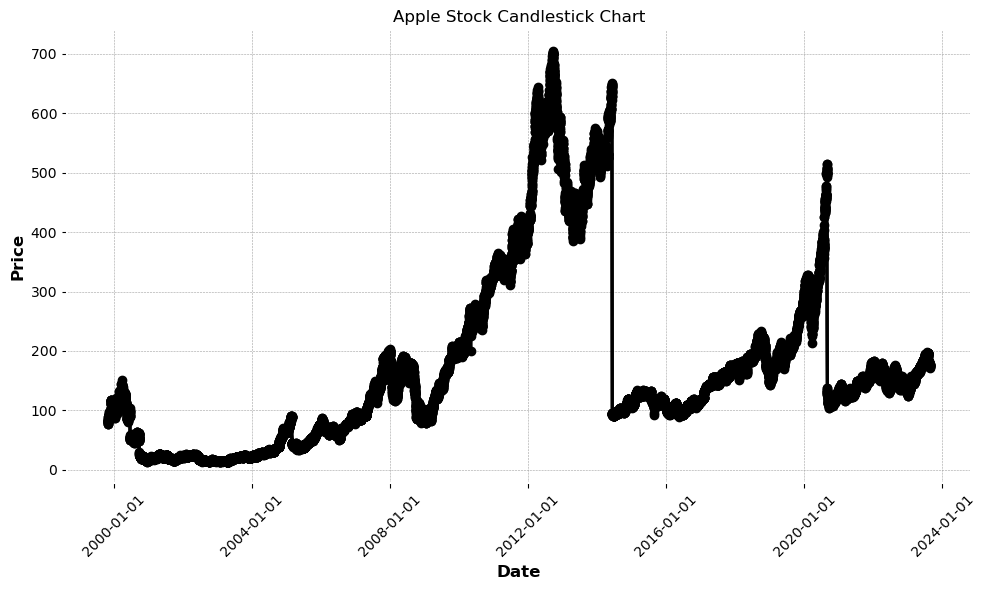

In [10]:
from matplotlib.dates import date2num

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(10, 6))
candlestick = ax.plot(APPL_stocks_df.index, APPL_stocks_df[['Open', 'Close', 'High', 'Low']].values, marker='o', linestyle='-', color='black')

# Format x-axis as dates
ax.xaxis_date()
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax.set_title('Apple Stock Candlestick Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.tight_layout()
plt.show()


# Volume Chart:
Visualize the trading volume over time using a bar chart. This can help you identify periods of high trading activity.

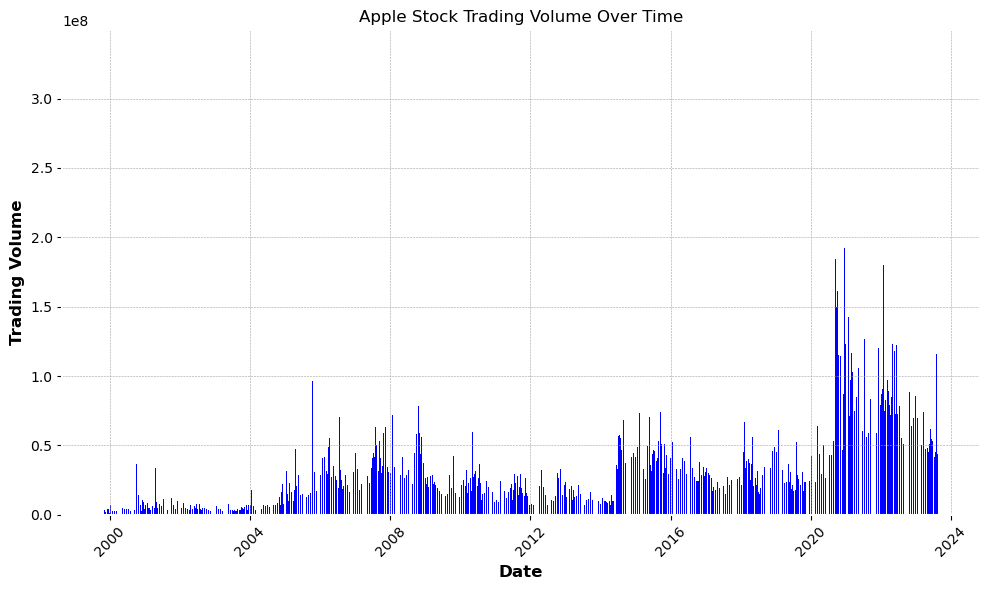

In [11]:
# Create the volume chart using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(APPL_stocks_df.index, APPL_stocks_df['Volume'], color='blue')
plt.title('Apple Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Moving Averages:
Plot moving averages (e.g., 50-day and 200-day moving averages) along with the actual stock prices to observe trends more clearly.This example calculates both the 50-day and 200-day moving averages using the rolling() function and then plots the actual stock prices along with these moving averages. The different lines on the plot allow you to observe trends more clearly and identify potential crossovers or patterns.

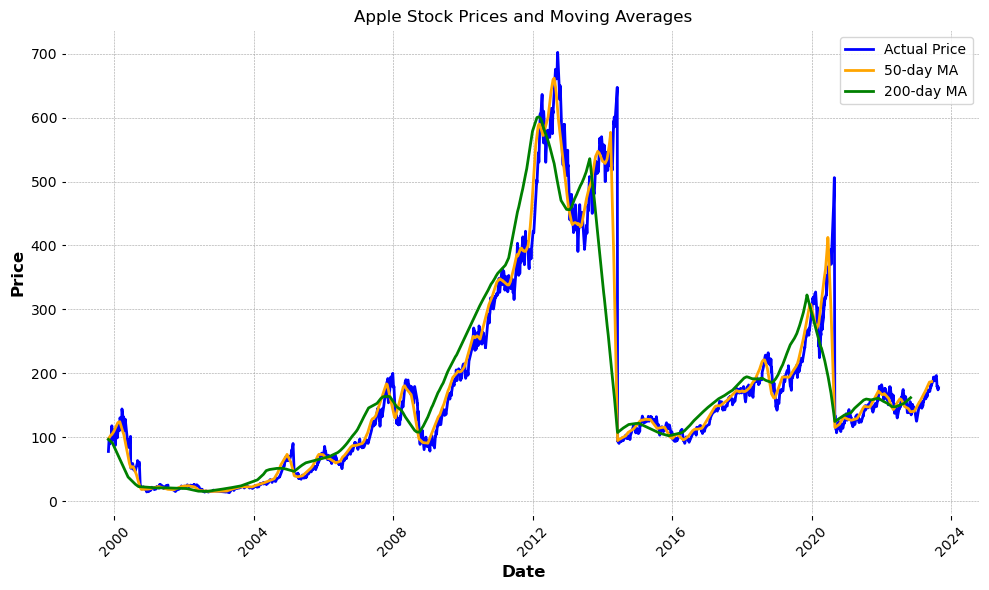

In [12]:
# Calculate moving averages
APPL_stocks_df['50-day MA'] = APPL_stocks_df['Close'].rolling(window=50).mean()
APPL_stocks_df['200-day MA'] = APPL_stocks_df['Close'].rolling(window=200).mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Close'], label='Actual Price', color='blue')
plt.plot(APPL_stocks_df.index, APPL_stocks_df['50-day MA'], label='50-day MA', color='orange')
plt.plot(APPL_stocks_df.index, APPL_stocks_df['200-day MA'], label='200-day MA', color='green')
plt.title('Apple Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Volatility Visualization:
Plot the range between high and low prices over time to visualize stock price volatility.This example calculates the price range (volatility) between high and low prices for each date and then plots the price range over time. The y-axis represents the price range, and the x-axis represents the dates. This allows you to visually observe periods of high and low volatility in the stock's price movements.

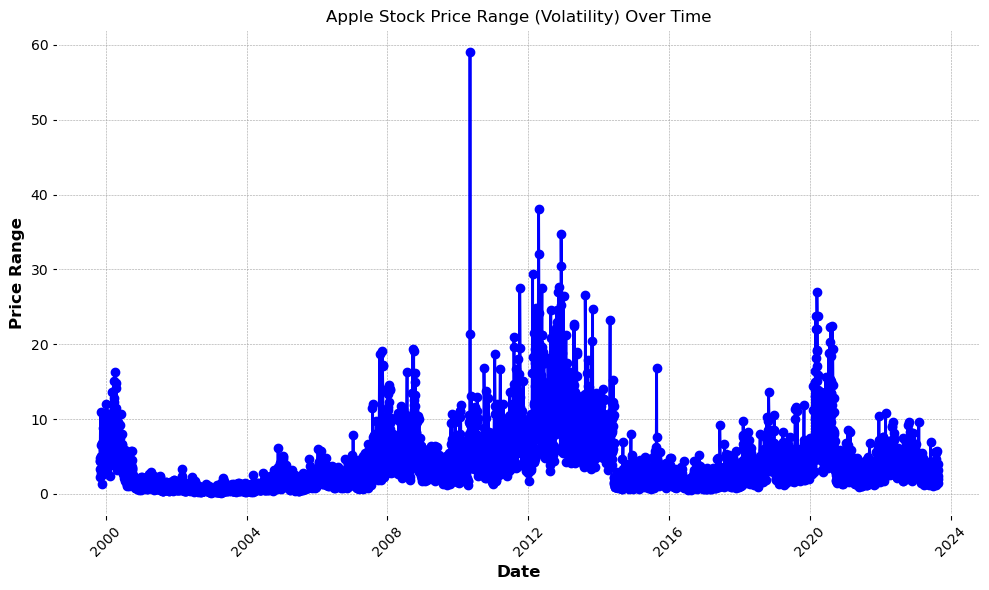

In [13]:
# Calculate the range (volatility) between high and low prices
APPL_stocks_df['Price Range'] = APPL_stocks_df['High'] - APPL_stocks_df['Low']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['Price Range'], marker='o', linestyle='-', color='blue')
plt.title('Apple Stock Price Range (Volatility) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Performance Metrics:

Calculate metrics like daily returns and cumulative returns to assess the stock's historical performance. Calculating daily returns and cumulative returns are important steps to assess the historical performance of a stock.
This example calculates both the daily returns and cumulative returns using the pct_change() function and the cumulative product. It then creates two subplots: one for visualizing daily returns and another for cumulative returns. The y-axes represent the respective returns, and the x-axes represent the dates.

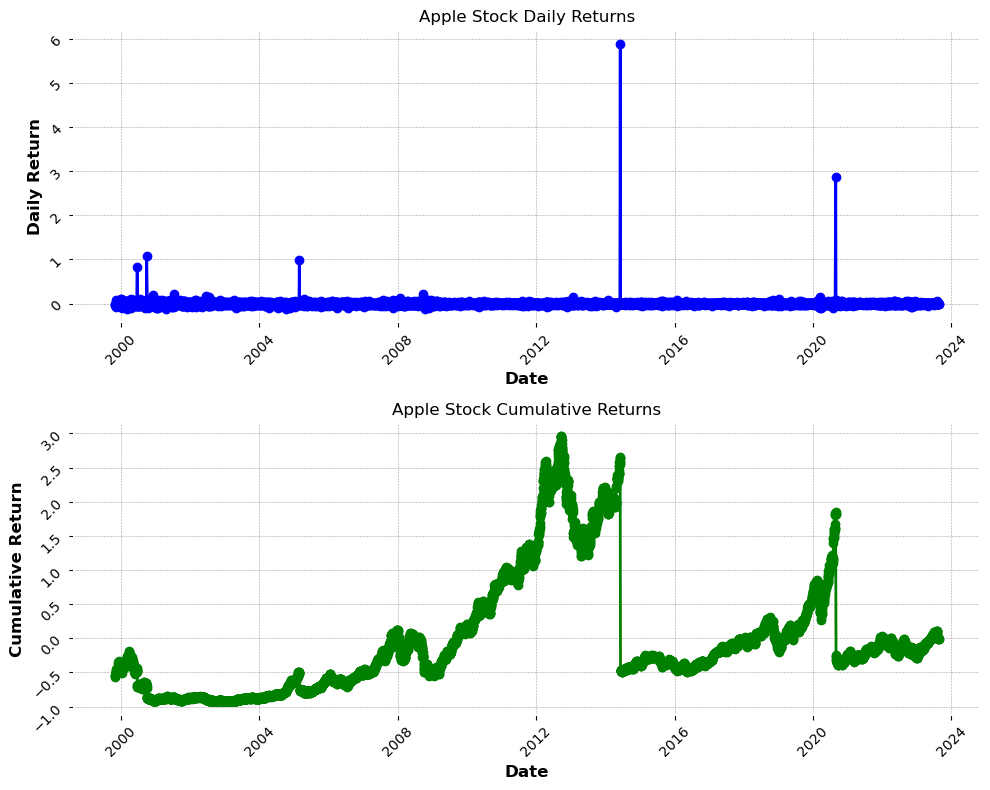

In [14]:
# Calculate daily returns
APPL_stocks_df['Daily Return'] = APPL_stocks_df['Close'].pct_change()

# Calculate cumulative returns
APPL_stocks_df['Cumulative Return'] = (1 + APPL_stocks_df['Daily Return']).cumprod() - 1

# Create the plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot daily returns
axes[0].plot(APPL_stocks_df.index, APPL_stocks_df['Daily Return'], marker='o', linestyle='-', color='blue')
axes[0].set_title('Apple Stock Daily Returns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily Return')
axes[0].grid(True)
axes[0].tick_params(rotation=45)

# Plot cumulative returns
axes[1].plot(APPL_stocks_df.index, APPL_stocks_df['Cumulative Return'], marker='o', linestyle='-', color='green')
axes[1].set_title('Apple Stock Cumulative Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cumulative Return')
axes[1].grid(True)
axes[1].tick_params(rotation=45)

plt.tight_layout()
plt.show()


# Scatter Plot with Regression Line:
Plot a scatter plot between two variables (e.g., high prices and volume) and add a regression line to analyze their relationship.This example uses Seaborn's regplot() function to create a scatter plot between the 'High' prices and 'Volume'. The regression line is automatically added to the plot, helping you visualize the relationship between the two variables. The scatter_kws={'s': 80} argument adjusts the size of the scatter points.

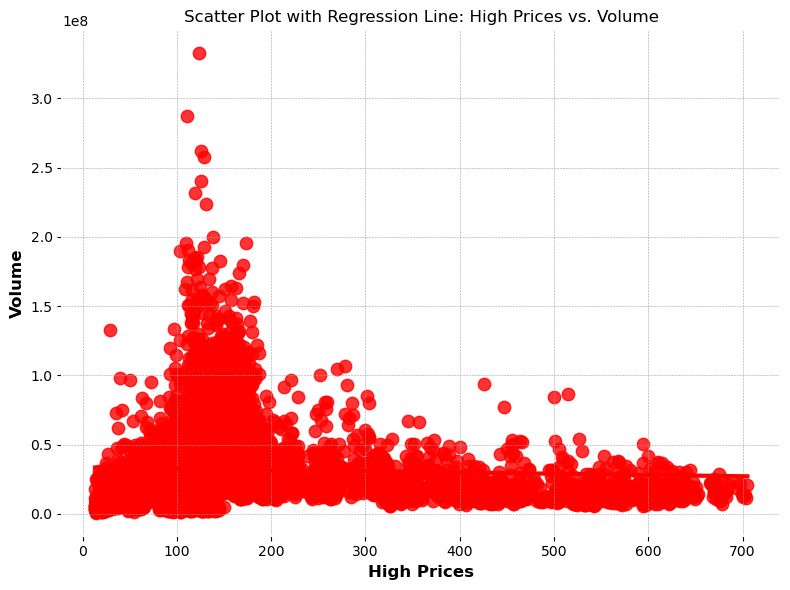

In [15]:
import seaborn as sns

# Create the scatter plot with regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(x='High', y='Volume', data=APPL_stocks_df, scatter_kws={'s': 80}, color='red')
plt.title('Scatter Plot with Regression Line: High Prices vs. Volume')
plt.xlabel('High Prices')
plt.ylabel('Volume')
plt.tight_layout()

plt.show()


# Time series analysis involves examining data points collected at regular intervals over time to identify patterns, trends, and seasonality. Here's how you can explore time series patterns and seasonality in your data using Python's Pandas, Matplotlib, and StatsModels libraries:
Autocorrelation:
Autocorrelation measures the correlation between a time series and a lagged version of itself. It's useful for identifying repeating patterns in the data.
Seasonal Decomposition:
Seasonal decomposition separates a time series into trend, seasonal, and residual components. It helps in understanding the underlying patterns and seasonality in the data.

In [17]:
!pip install statsmodels

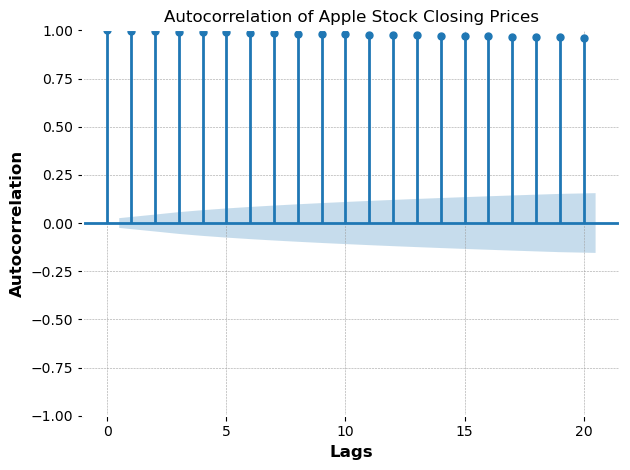

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate autocorrelation and plot ACF
plot_acf(APPL_stocks_df['Close'], lags=20)
plt.title('Autocorrelation of Apple Stock Closing Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.tight_layout()

plt.show()


In [21]:
# Remove columns 
columns_to_remove = ['50-day MA', '200-day MA', 'Price Range', 'Daily Return', 'Cumulative Return']
APPL_stocks_df.drop(columns=columns_to_remove, inplace=True)
APPL_stocks_df

,Open,High,Low,Close,Volume
2023-08-22,177.06,177.6800,176.250,177.23,42084245
2023-08-21,175.07,176.1300,173.735,175.84,46311879
2023-08-18,172.30,175.1000,171.960,174.49,61172150
2023-08-17,177.14,177.5054,173.480,174.00,66062882
2023-08-16,177.13,178.5400,176.500,176.57,46964857
...,...,...,...,...,...
1999-11-05,84.62,88.3700,84.000,88.31,3721500
1999-11-04,82.06,85.3700,80.620,83.62,3384700
1999-11-03,81.62,83.2500,81.000,81.50,2932700
1999-11-02,78.00,81.6900,77.310,80.25,3564600


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Specify a period (e.g., 5 for weekly data)
period = 5

# Set the frequency of the index
APPL_stocks_df.index.freq = pd.infer_freq(APPL_stocks_df.index)

# Seasonal decomposition
result = seasonal_decompose(APPL_stocks_df['Close'], model='multiplicative')

# Plot decomposition components
plt.figure(figsize=(10, 8))
result.plot()
plt.title('Seasonal Decomposition of Apple Stock Closing Prices')
plt.tight_layout()

plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

# Basic Statistics

In [24]:
import pandas as pd

# Compute basic statistics
mean_values = APPL_stocks_df.mean()
median_values = APPL_stocks_df.median()
std_dev_values = APPL_stocks_df.std()

print("Mean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nStandard Deviation Values:")
print(std_dev_values)


Mean Values:
Open      1.732430e+02
High      1.751774e+02
Low       1.711999e+02
Close     1.732454e+02
Volume    3.187800e+07
dtype: float64

Median Values:
Open      1.324050e+02
High      1.341650e+02
Low       1.303650e+02
Close     1.323000e+02
Volume    2.334015e+07
dtype: float64

Standard Deviation Values:
Open      1.505406e+02
High      1.517830e+02
Low       1.490943e+02
Close     1.504748e+02
Volume    3.012338e+07
dtype: float64


# Correlation Heatmap:
Use a heatmap to visualize the correlation matrix between different stock attributes. Positive values indicate positive correlation, negative values indicate negative correlation, and values close to 0 indicate weak or no correlation.

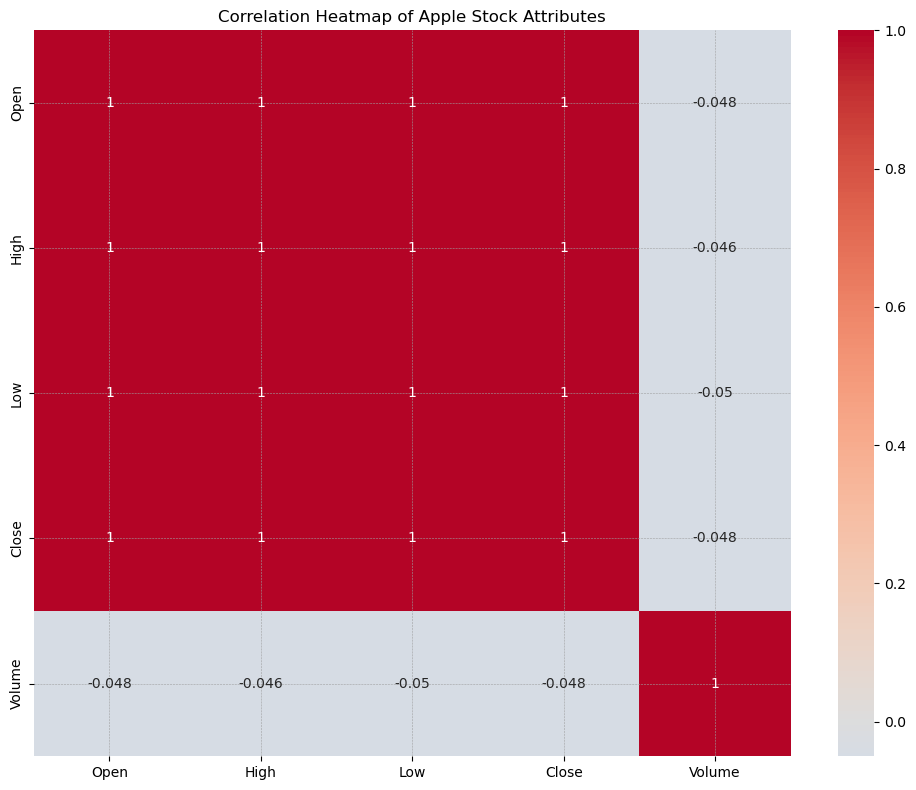

In [28]:
# Calculate the correlation matrix
correlation_matrix = APPL_stocks_df.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Apple Stock Attributes')
plt.tight_layout()

plt.show()

# MACD and Signal Line Plot:
Plot the MACD (Moving Average Convergence Divergence) along with the signal line to identify potential buy or sell signals.

In [25]:
!pip install pandas_ta

     ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
     -------------------------------------- 115.1/115.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218924 sha256=540651c411cbd4062df1dc82c7c4026231e89179cefa5ea87c2c1f9adb77e50c
  Stored in directory: c:\users\panka\appdata\local\pip\cache\wheels\1e\5c\47\759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


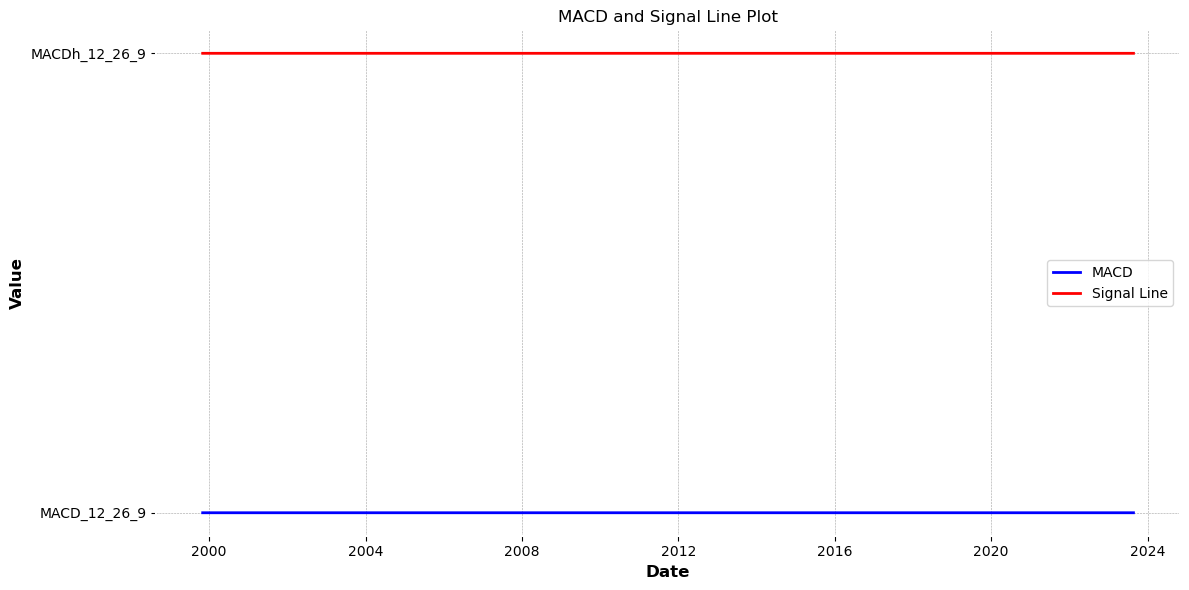

In [27]:
import pandas_ta as ta

# Calculate MACD and Signal Line
APPL_stocks_df['macd'], APPL_stocks_df['signal_line'], _ = ta.macd(APPL_stocks_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Plot MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(APPL_stocks_df.index, APPL_stocks_df['macd'], label='MACD', color='blue')
plt.plot(APPL_stocks_df.index, APPL_stocks_df['signal_line'], label='Signal Line', color='red')
plt.legend()
plt.title('MACD and Signal Line Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()
